In [38]:

import tweepy as tw
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt

In [39]:
CONSUMER_KEY = 'kytjMO37C636GU102l3DJhAog'
CONSUMER_SECRET = 'AH0aN44Xk4nxrFyvqHczn6QYSrhWMzkQeeVUWcyTvS10x9iQd9'
ACCESS_TOKEN = '1343561209644138496-cmbkWhQdwP7snLoiroAWNtT5hkHka1'
ACCESS_TOKEN_SECRET = 'sNSkJkAzYQv9DyqUpu6vDB0E5UQllTkPBAo59PjZ0Vngq'

#authenticate
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit = True)

In [40]:
hashtag = ["Trump"]
query = tw.Cursor(api.search, q = hashtag).items(2000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
#print(tweets)

In [41]:
df = pd.DataFrame.from_dict(tweets)
df.head(8)

,Tweet,Timestamp
0,I thought Trump’s cabinet members were resigni...,2021-01-12 03:52:09
1,RT @levparnas: This is one of the Russian-link...,2021-01-12 03:52:09
2,RT @ChuckRossDC: “Death is the only remedy for...,2021-01-12 03:52:09
3,RT @Fxhedgers: PATRIOTS COACH BILL BELICHICK T...,2021-01-12 03:52:09
4,RT @nycsouthpaw: Susan Collins writes things t...,2021-01-12 03:52:09
5,RT @AW2B12: @BeschlossDC Could it be that Trum...,2021-01-12 03:52:09
6,RT @funder: BREAKING: DC Attorney General is l...,2021-01-12 03:52:09
7,Does anyone feel nervous that we aren’t hearin...,2021-01-12 03:52:09


In [43]:
import re
def clean_Text(text ): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|\
                           (\w+:\/\/\S+)", " ", text).split()) 

df['Tweet'] = df['Tweet'].apply(clean_Text)
df.head()

,Tweet,Timestamp
0,I thought Trump s cabinet members were resigni...,2021-01-12 03:52:09
1,RT This is one of the Russian linked actors sa...,2021-01-12 03:52:09
2,RT Death is the only remedy for what s in that...,2021-01-12 03:52:09
3,RT PATRIOTS COACH BILL BELICHICK TURNS DOWN TR...,2021-01-12 03:52:09
4,RT Susan Collins writes things that logically ...,2021-01-12 03:52:09


In [44]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
#stop_word = stopwords.words('Trump')
custom_stopwords = ['RT', 'https', 'Trump','trump','Donald']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
def preprocess_tweets(tweets, custom_stopwords):
    processed_tweet = tweets
    processed_tweet.replace('[^\w\s]','')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,I thought Trump s cabinet members were resigni...,2021-01-12 03:52:09,I thought cabinet member resigning order cowar...
1,RT This is one of the Russian linked actors sa...,2021-01-12 03:52:09,This one Russian linked actor sanctioned Treas...
2,RT Death is the only remedy for what s in that...,2021-01-12 03:52:09,Death remedy building Twitter sleuth dubbed Ca...
3,RT PATRIOTS COACH BILL BELICHICK TURNS DOWN TR...,2021-01-12 03:52:09,PATRIOTS COACH BILL BELICHICK TURNS DOWN TRUMP...
4,RT Susan Collins writes things that logically ...,2021-01-12 03:52:09,Susan Collins writes thing logically oblige vo...


from textblob import TextBlob
def analyze_sentiment(text):
        analysis = TextBlob(text.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    #def tweets_to_data_frame(self, tweets):
        #df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

df['Processed Tweet2'] = df['Processed Tweet'].apply(analyze_sentiment)
df.head()

In [46]:
df.head()

,Tweet,Timestamp,Processed Tweet
0,I thought Trump s cabinet members were resigni...,2021-01-12 03:52:09,I thought cabinet member resigning order cowar...
1,RT This is one of the Russian linked actors sa...,2021-01-12 03:52:09,This one Russian linked actor sanctioned Treas...
2,RT Death is the only remedy for what s in that...,2021-01-12 03:52:09,Death remedy building Twitter sleuth dubbed Ca...
3,RT PATRIOTS COACH BILL BELICHICK TURNS DOWN TR...,2021-01-12 03:52:09,PATRIOTS COACH BILL BELICHICK TURNS DOWN TRUMP...
4,RT Susan Collins writes things that logically ...,2021-01-12 03:52:09,Susan Collins writes thing logically oblige vo...


In [47]:
import vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# method to assign sentiment class based on compound score from VADER
def sent_Class(x ):
    if x['compound'] >= 0.05:
        return 'positive'
    elif  (x['compound'] > -0.05) and (x['compound'] < 0.05):
        return 'neutral'
    elif x['compound'] <= -0.05  :
        return 'negative'
 
#Intialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#method to compute sentiment score for tweet
def sentiment(x ):
    
    return analyzer.polarity_scores(x)


df['Sentiment'] = df['Processed Tweet'].apply(sentiment)
df['SentimentCat'] = df['Sentiment'].apply(sent_Class)

df.head()

,Tweet,Timestamp,Processed Tweet,Sentiment,SentimentCat
0,I thought Trump s cabinet members were resigni...,2021-01-12 03:52:09,I thought cabinet member resigning order cowar...,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp...",negative
1,RT This is one of the Russian linked actors sa...,2021-01-12 03:52:09,This one Russian linked actor sanctioned Treas...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",positive
2,RT Death is the only remedy for what s in that...,2021-01-12 03:52:09,Death remedy building Twitter sleuth dubbed Ca...,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...",negative
3,RT PATRIOTS COACH BILL BELICHICK TURNS DOWN TR...,2021-01-12 03:52:09,PATRIOTS COACH BILL BELICHICK TURNS DOWN TRUMP...,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...",positive
4,RT Susan Collins writes things that logically ...,2021-01-12 03:52:09,Susan Collins writes thing logically oblige vo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


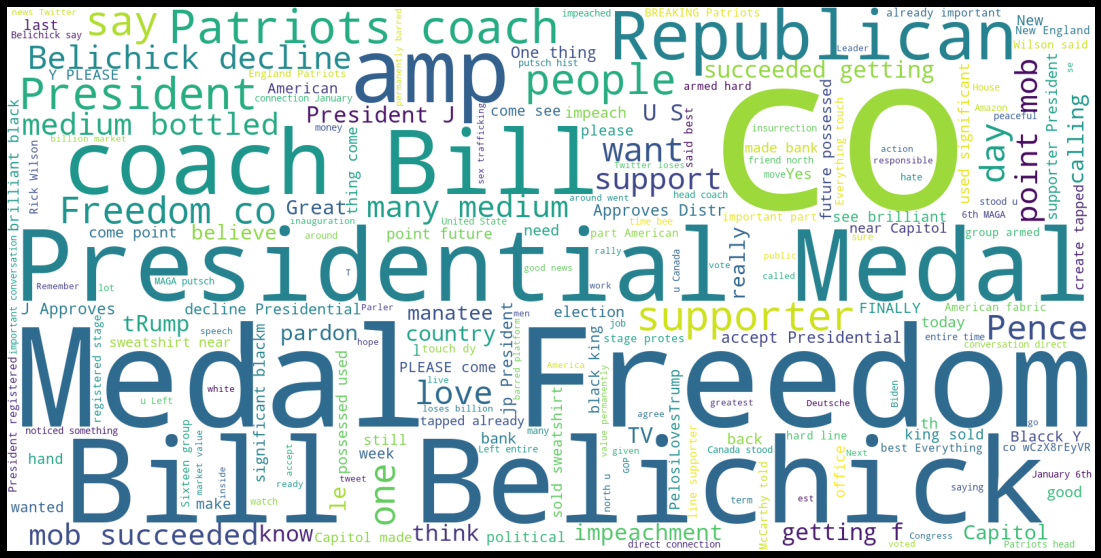

In [48]:
#Group tweets by sentiment

tweetsCategories = df.groupby('SentimentCat')

positiveTweets = pd.DataFrame()
negativeTweets = pd.DataFrame()

for catName,tweetCategory in tweetsCategories:
    if catName == 'positive':
        positiveTweets = tweetCategory
    elif catName == 'negative':
        negativeTweets = tweetCategory
        
#Create word cloud for both positive and negative tweets
        
positiveText = ' '.join(positiveTweets['Processed Tweet'].tolist())

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(positiveText)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positivewordcloud.png', facecolor='k', bbox_inches='tight')

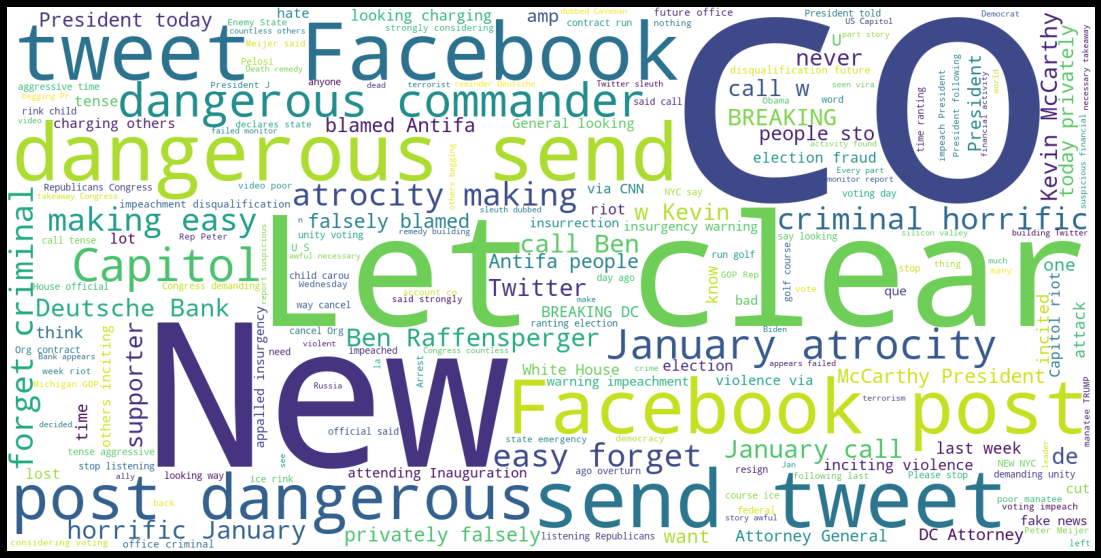

In [49]:
negativeText = ' '.join(negativeTweets['Processed Tweet'].tolist())

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(negativeText)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negativewordcloud.png', facecolor='k', bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

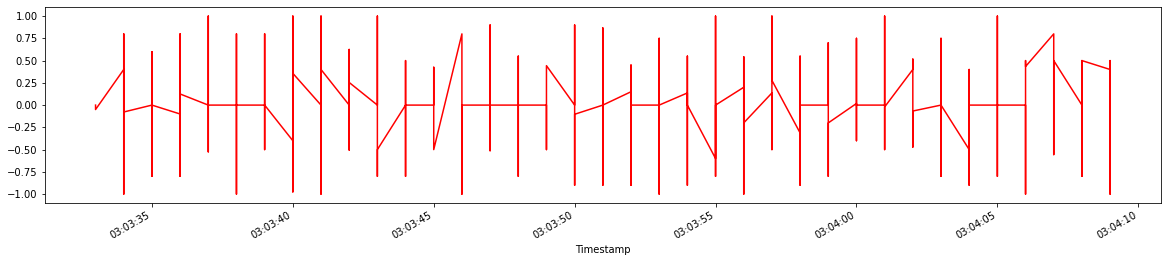

In [37]:
from textblob import Word, TextBlob

df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])


sentiment_series = pd.Series(data = df['polarity'].values, index = df['Timestamp'])
sentiment_series.plot(figsize=(20, 4), color = 'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

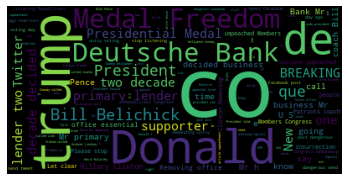

In [34]:
from wordcloud import WordCloud

text = ' '.join(df['Processed Tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show

In [ ]:
import nltk
nltk.download()

In [ ]:
from nltk.corpus import stopwords
print(stopwords.fileids())

In [ ]:
nltk.download("stopwords")